<a href="https://colab.research.google.com/github/ndnvo/Analysis_projects/blob/main/Terrorism_project_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**⚔️ 💣 THE TWO MOST AGGRESSIVE TERRORIST GROUPS DURING 2010-2019  💣 ⚔️** 

***👨🏼‍💻 Prepared by Duy Nghi, January 2021***

 🚩 Personal project as a part of the course Fulltime DataScience @ CoderSChool



<img src="https://www.gale.com/binaries/content/gallery/gale-us-en/banners/databases/infotrac/databases_infotrac_warandterrorism_banner.jpg" alt="Drawing" style="width: 800px;"/>


Terrorism is by no means just a 21st century issue, with attacks that could be described as terrorist dating back as far as the Roman Empire. As for the word ‘terrorism’, its usage emerges from the Reign of Terror during the French Revolution – although the fact that the violence was conducted by the state ironically means it likely does not qualify as terrorism. Over the past decade, terrorists killed an average of 21,000 people worldwide each year. Specifically, in 2017, terrorism was responsible for 0.05% of global deaths (Source: [OurWorldInData](https://ourworldindata.org/terrorism))

The data is acquired directly from The Global Terrorism Database (GTD)™, last uploaded on 17 September, 2019 ([Link](https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx))


> The Global Terrorism Database (GTD)™ is the most comprehensive unclassified database of terrorist attacks in the world. It is an open-source database, which provides information on domestic and international terrorist attacks around the world since 1970, and now includes more than 200,000 events. For each event, a wide range of information is available, including the date and location of the incident, the weapons used, nature of the target, the number of casualties, and – when identifiable – the group or individual responsible.

The aim of this project is to find out the most dangerous terrorist groups of the last decade, then analyze further to see if there is any significant differences in the way they operate terrorism activities.

Tools used in the project: Pandas, Matplotlib, Seaborn & some visualization libraries


### **☆ FINDING**

The early years of the past century were quite peacefully, with moderate number of terrorist activities from 2010-2013. Then, the amount of terrorism indicents peaked at around 2014-2017 before slowing down to the end of the period. The most noticeable trend of terrorism over the past decade is the overrepresentation of the Middle East, North Africa, and South Asia in the number of terrorist attacks by region. Together, these regions account for over 74,700 of the 98,328 terrorist attacks worldwide between 2010 and 2019. 

Based on the number of attacked conducted and casualities causes, the two most dangerous and active terrorist organizations of the decase are Islamic State (ISIL) and the Taliban, who were responsible for a combined 16,000 terrorist attacks throughout the period.

Some key findings related to the similarities & differences in the way this two terrorist groups conducting terror activities are:

* Taliban group is more geographically-concentrated when they only conducted terrorism activities in Afghanistan and its neighbourhood. However,Taliban has spreaded its terrorist activities across a huge amount of different cities in this country. Specifically, in 2019, Taliban has attacked 706 different cities in Afghanistan. On the other hand,  ISIL's presence is more widespread accross different regions of the globe. They have actively conducted attacks in Middle East and Africa, South Asia. Some key target countries of this terror group include: Iraq, Syria, Turkey, Lebanon, Philippines


* Taliban has a longer history of conducting terroist activities, while ISIL only started to become prominent since 2013 (formerly a part of the al-Qaeda in Iraq (AQI) group). In its first year after renaming, ISIL was not very active and only conducted roughtly 400 attacks. However, it has quickly become very aggresstive over the next 4 year with more than 1,200 attacks per year continuously (with a peak of the whole period in 2016 at ~ 1,500 attacks). Also during this period, ISIL conducted the most deadliest attack of the decade: [Camp Speicher massacre](https://en.wikipedia.org/wiki/Camp_Speicher_massacre), on 06/12/2014 in Tikrit city, killing nearly 1600 people.


* The period from December - March could be considered as a peaceful/ "off-peak" season when both of the two terrorist groups do not conduct many attacks. In contrast, both terrorist parties often become very active since April and keep the attacking momentum until October - November.


* Taliban is more versatile and flexibly adopts various forms of weapons quite equally (Explosives, Firearms and Unknown). Meanwhile, ISIL soly focused on using explosive weapons rather than adopting other forms of attacks.

* Nearly 2500 attacks conducted by Taliban group in the past decade used "Unknown" weapon types - That sounds mysterious, and we might need to conduct further research to reveal the forms of weapons that Taliban used.

* Interestingly, even though ISIL is the group with fewer use of unidentified weapons, it has caused the most casualities with unknown weapon attacks: Nearly 1000 people were killed on 3/8/2014 in Sinja, Iraq and the weapon type remained "Unknown"



### **☆ CHALLENGE**

Several key learnings undercovered through the analysis:

* Various variables in the original dataset: With more than 130 columns, it takes time to read and understand the variables and decided which ones to keep for further analysis.

* Lack of domain knowledge in the topic of terrorism: Due to this issue, I initially found it hard to shape interesting questions that can be answered from the dataset. I overcame this challenge by reading articles and newspapers about terrorism activities of the selected period, and kept reading along the way of the analysis process. When I came up with interesting ideas/ information, I noted down and related to the dataset to check if these insights can be revoked from the dataset.

* Practice using a combination of Matplotlib & Seaborn to plot and customize the graphs

* Some tools/ libraries not working directly on the environment of GoogleCollab (for example: how to generate animated GIF maps) ==> Learn how to search effectively on Google/ StackoverFlow for the relevant topics


## 1. PREPROCESS DATA



### 1.1 Import Libraries

First, let's mount the notebook to GoogleDrive to load the data saved in GD

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the libraries needed for the analysis in the workbook

In [2]:
import math
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"
!pip install basemap
!apt install imagemagick
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import codecs
from subprocess import check_output
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

     |████████████████████████████████| 881 kB 3.8 MB/s 
     |████████████████████████████████| 30.5 MB 1.4 MB/s 
     |████████████████████████████████| 6.3 MB 49.2 MB/s 
     |████████████████████████████████| 219 kB 17.3 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=45da45834da635e0d7cae18a7b3e060e4d77b1568ee2f0b404d91c2bb2332184
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono g

In [3]:
#Setting wrapping text display for the workbook

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### 1.2 Explore Dataset

In [4]:
#Read the dataset to DF
df = pd.read_csv("/content/gdrive/MyDrive/Data Science Course/Terrorism project - Duy Nghi/globalterrorismdb_0221dist.csv",encoding='ISO-8859-1')
df.sample(5)

,ï»¿eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
141680,201412160009,2014,12,16,NaN,0,NaN,228,Yemen,10,Middle East & North Africa,Al Bayda,Radaa,14.413989,44.837419,1.0,0,NaN,12/16/2014: A suicide bomber detonated an expl...,1,1,1,0,NaN,NaN,1,1,1,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,84.0,Political Party Member/Rally,General People's Congress (GPC),House of Head: Abdallah Idris,...,NaN,NaN,NaN,11.0,0.0,1.0,NaN,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,A house was damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""2 Bombers Kill 26 Including 16 Students in Ye...","""Two car bombs explode in central Yemen killin...","""Yemen twin car bombs kill 25, including 15 ch...",START Primary Collection,0,1,0,1,"201412160009, 201412160010"
46023,199104050006,1991,4,5,NaN,0,NaN,159,Peru,3,South America,Lima,Chaclacayo,-11.975814,-76.769900,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,107.0,Electricity,Lima Electric Power Enterprise,High Tension Power Lines,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),50000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,"199104050004, 199104050005, 199104050006"
117164,201305150006,2013,5,15,NaN,0,NaN,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303567,44.371771,1.0,0,The incident took place in the Sadr City area.,05/15/2013: Three explosives-laden vehicles de...,1,1,1,0,NaN,NaN,1,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Not Applicable,Civilians,...,NaN,NaN,Three car bombs were used in the attack.,1.0,0.0,0.0,13.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""9 killed, 65 wounded in car bombings in Iraqi...","""At least 35 people were killed and 134 others...",NaN,START Primary Collection,-9,-9,0,-9,"201305150003, 201305150004, 201305150005, 2013..."
183565,201801250003,2018,1,25,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Dasawao,7.022096,124.527914,1.0,0,The incident occurred in the Datu Piang district.,01/25/2018: An explosive device detonated targ...,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,72.0,Farmer,Not Applicable,"Farmers: Abusama Guiamin, Katib Mamatanto, Abd...",...,NaN,NaN,NaN,2.0,0.0,0.0,1.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""2 farmers dead, 1 hurt in Maguindanao rice fi...","""Philippines: 2 farmers die in bomb blast,"" Ph...","""Philippines: 2 farmers dead, 1 hurt in Maguin...",START Primary Collection,0,0,0,0,NaN
5722,197712310001,1977,12,31,NaN,1,30/1/78,83,Guatemala,2,Central America & Caribbean,Guatemala,Guatemala City,14.632614,-90.466950,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",government,"Roberto Herrera Ibarguen, former foreign minister",...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,365.0,NaN,Guatemala,1.0,500000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) releas

In [5]:
#Only select observations within the defined period: 2010 - 2019
df = df[df["iyear"] >2009]
df.shape

(106299, 135)

In [6]:
df.columns.to_list()

['ï»¿eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap'

There are 135 columns(variables) in the dataset, including various aspects with sub-levels across different features of terrorism activities, which makes it hard to jump into analysis straight away. 

Therefore, the first thing to do is to screen through the [GTD CodeBook](https://gtd.terrorismdata.com/files/gtd-codebook/) and decide which columns that are helpful in answering the defined questions to keep for further analysis.

### 1.3 Clean Dataset

In [7]:
# Rename Columns For Better Access
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType',
                   'city':"City",'latitude':"Latitude",'longitude':"Longitude", 'success':"Success",
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'target1':'Target', "targsubtype1_txt":"Target_subtype",'targtype1_txt':'Target_type',"natlty1_txt":"Target_nationality",
                   'weaptype1_txt':'Weapon_type',"weapsubtype1_txt":"Weapon_subtype", "propvalue":"Property_value",
                   'motive':'Motive'},inplace=True)

#Only select the meaningful columns

df=df[['Year','Month','Day','Country','Region','City','Latitude','Longitude', 'Success','AttackType','Killed','Wounded',
       'Target', 'Target_type', 'Target_subtype','Target_nationality','Summary','Group','Weapon_type','Weapon_subtype','Motive','Property_value']]

#Generate a new column as the combined value of casualities
df["Killed"].fillna(0, inplace = True)
df["Wounded"].fillna(0, inplace = True)
df['Casualities']=df['Killed']+df['Wounded']
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106299 entries, 94883 to 201182
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                106299 non-null  int64  
 1   Month               106299 non-null  int64  
 2   Day                 106299 non-null  int64  
 3   Country             106299 non-null  object 
 4   Region              106299 non-null  object 
 5   City                106190 non-null  object 
 6   Latitude            105702 non-null  float64
 7   Longitude           105702 non-null  float64
 8   Success             106299 non-null  int64  
 9   AttackType          106299 non-null  object 
 10  Killed              106299 non-null  float64
 11  Wounded             106299 non-null  float64
 12  Target              106278 non-null  object 
 13  Target_type         106299 non-null  object 
 14  Target_subtype      99624 non-null   object 
 15  Target_nationality  104960 non

After screening the dataset, 23 columns has been selected as relevant variables needed for the analysis. Full details of these columns are available in the [GTD CodeBook](https://gtd.terrorismdata.com/files/gtd-codebook/).

A snapshot of these variables is listed here:

* Year: year of the act. (numerical)

* Month: month number of the act. (numerical)

* Day: day number of the act. (numerical)

* Country: Country name. (categorical)

* Region: Region name (categorical

* City: The city where the act executed. (categorical)

* Latitude: Coordinate of the crime scene. (coordination)

* Longitude:Coordinate of the crime scene. (coordination)

* Success (categorical)

* AttackType: The type of the act (categorical)

* Killed: Number of the people that died in the act. (numerical)

* Wounded: Number of the people that wounded in the act. (numerical)

* Target: The name of the target. (object - text)

* Target_type & Target_subtype: The name of the target. (categorical)

* Target_nationality (categorical

* Summary: A short description of the act. (object-text)

* Group: The terrorist group that executed the terrorist act. (categorical)

* WeaponType: The type of the weapon used in the act. (categorical)

* Motive: The motivation behind the act. (object-text)

* Property_value: (numerical)

* Casualities: (numerical)

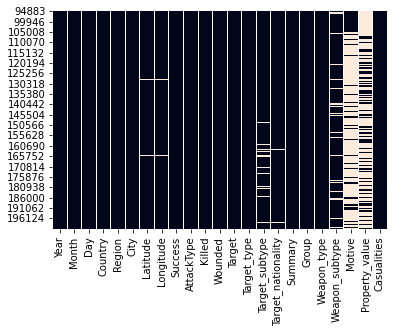

In [8]:
#Visualize the distribution of null_values
sns.heatmap(df_clean.isnull(), cbar=False)

There are various columns that are free from NULL values, which is a good thing :).

Let's handle the NULL values in each specific column:


- Dealing with missing values in Coordination columns: Generate a table including the mean value of Lat & Long of each country, then use these figures to fill in the NULL values in the rows according to the nation.

In [9]:
coordination = df_clean.groupby("Country")[["Latitude","Longitude"]].mean()
coordination

,Latitude,Longitude
Country,,
Afghanistan,34.115894,67.111485
Albania,41.321371,19.720223
Algeria,35.852538,4.471447
Angola,-6.826857,13.404147
Argentina,-35.736068,-61.107675
...,...,...
West Bank and Gaza Strip,31.820647,35.058513
Western Sahara,26.158487,-10.559147
Yemen,14.343303,44.935810


In [10]:
def fix_latitude(row):
  if pd.isna(row["Latitude"]):
     return coordination.loc[row["Country"]][0]
  else:
    return row["Latitude"]

def fix_longitude(row):
  if pd.isna(row["Longitude"]):
     return coordination.loc[row["Country"]][1]
  else:
     return row["Longitude"]

In [11]:
df_clean["Latitude"] = df_clean.apply(fix_latitude, axis =1)
df_clean["Longitude"] = df_clean.apply(fix_longitude, axis =1)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106299 entries, 94883 to 201182
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                106299 non-null  int64  
 1   Month               106299 non-null  int64  
 2   Day                 106299 non-null  int64  
 3   Country             106299 non-null  object 
 4   Region              106299 non-null  object 
 5   City                106190 non-null  object 
 6   Latitude            106299 non-null  float64
 7   Longitude           106299 non-null  float64
 8   Success             106299 non-null  int64  
 9   AttackType          106299 non-null  object 
 10  Killed              106299 non-null  float64
 11  Wounded             106299 non-null  float64
 12  Target              106278 non-null  object 
 13  Target_type         106299 non-null  object 
 14  Target_subtype      99624 non-null   object 
 15  Target_nationality  104960 non

- Dealing with missing values in Text-related columns: Target, Target_subtype, Target_nationality, Weapon_subtype & Motive ==> Fill with "Unknown" text

- Dealing with missing values in Property_value column: Fill with 0.

In [13]:
df_clean.fillna({'Target':"Unknown",'Target_subtype':"Unknown", 'Target_nationality':"Unknown",'Weapon_subtype':"Unknown",'Motive':"Unknown","Property_value":0},inplace=True)

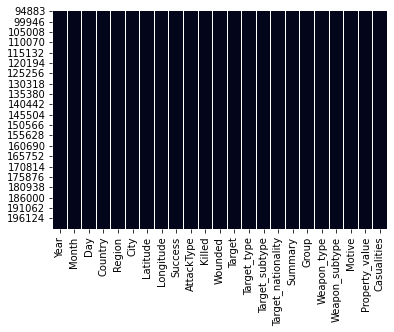

In [14]:
#Visualize the distribution of null_values
sns.heatmap(df_clean.isnull(), cbar=False)

Check for value constraint of Daytime values

In [15]:
df_clean["Day"].unique()

array([ 1,  0,  2,  3,  4,  5,  7,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 29, 31])

In [16]:
#Replace 0 value with 1 - after checking with incident details
df_clean["Day"].replace({0: 1}, inplace=True)

In [17]:
df_clean["Month"].unique() #look good

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
df_clean["Year"].unique() #look good

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

The dataset is now free of Null values, and is ready for analysis using Pandas tools to find out interesting insights. Let't jump into it

## 2. DATA ANALYSIS

### 2.1 An overview of the terrorist activities over the past decade

In [19]:
plt.style.use("dark_background")


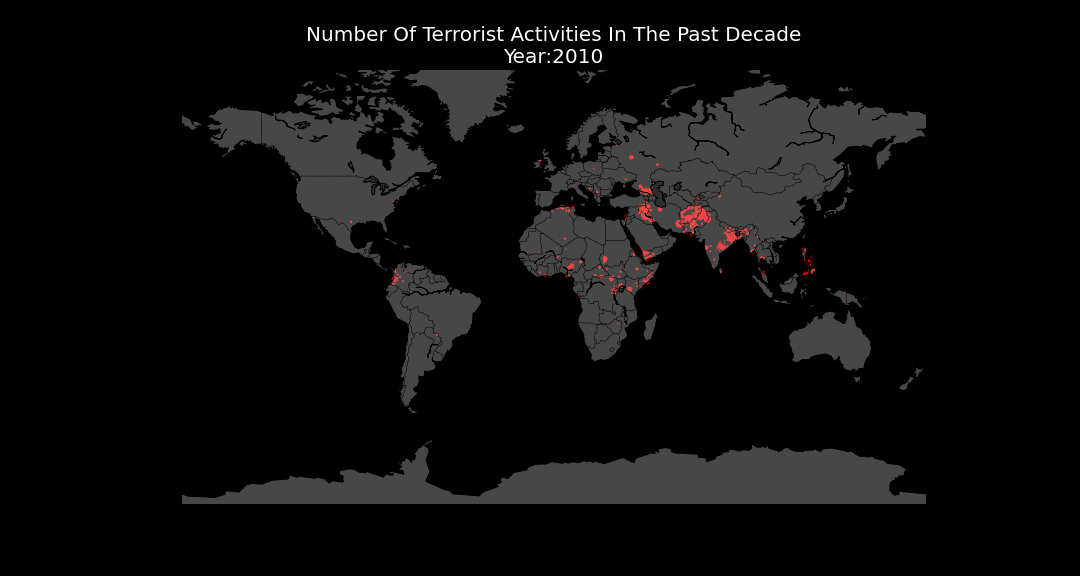

In [20]:
fig = plt.figure(figsize = (15,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Number Of Terrorist Activities In The Past Decade'+'\n'+'Year:' +str(Year), size = 20)
    map = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat=list(df_clean[df_clean['Year']==Year].Latitude)
    long=list(df_clean[df_clean['Year']==Year].Longitude)
    x,y=map(long,lat)
    map.scatter(x, y,s=[(kill+wound)*0.15 for kill,wound in zip(df_clean[df_clean['Year']==Year].Killed,df_clean[df_clean['Year']==Year].Wounded)],color = 'r')
    map.drawcoastlines()
    map.drawcountries()
    map.fillcontinents(zorder = 1,alpha=0.35)
    map.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(df_clean.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

**☆ Finding**

The past century started quite peacefully, with moderate number of terrorist activities from 2010-2013. Then, the amount of terrorism indicents peaked at around 2014-2017 before slowing down to the end of the period.

Besides, it is noticeable that terrorist incidents are very geographical- focused. Consistently throughout the years, Middle East and Africa areas are the hotpots that suffered from terrorists. Other minor hotspots include Southeast Asia, Europe & America.


In [50]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

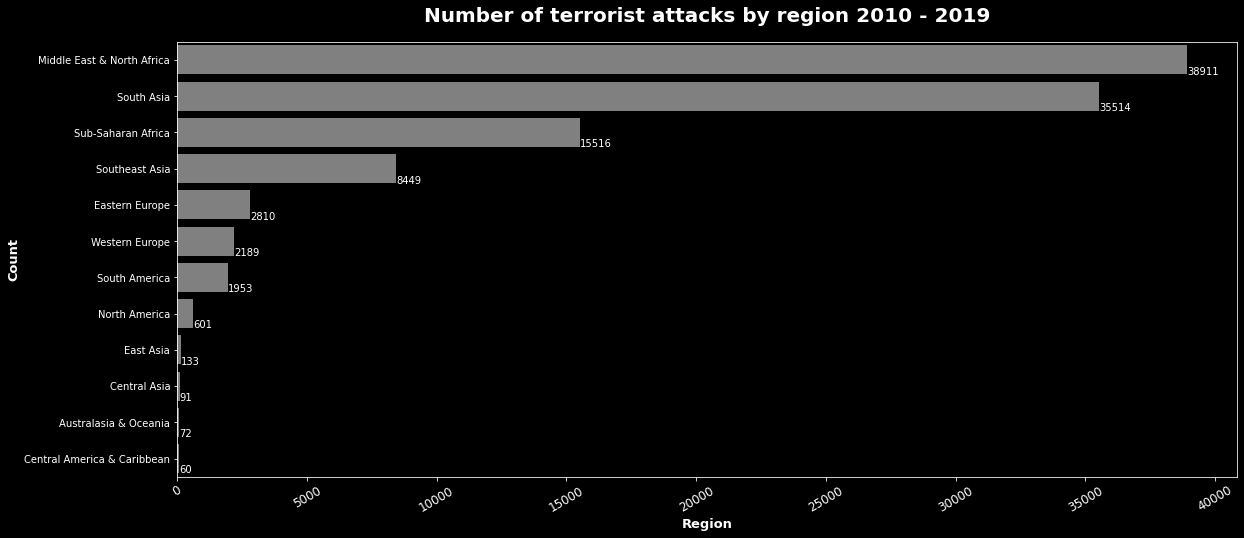

In [54]:
plt.figure(figsize=(19, 8))
ax = sns.countplot(data = df_clean, y = "Region", order = df_clean["Region"].value_counts().index, color = "grey")
plt.xticks(rotation=30, size = 12)
plt.xlabel("Region", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')
plt.title("Number of terrorist attacks by region 2010 - 2019", size = 20,weight='bold', pad=20)
show_values_on_bars(ax, "h", 0.5)

Text(0.5, 1.0, 'Top 10 countries with the most terrorist attacks during 2010 - 2019')

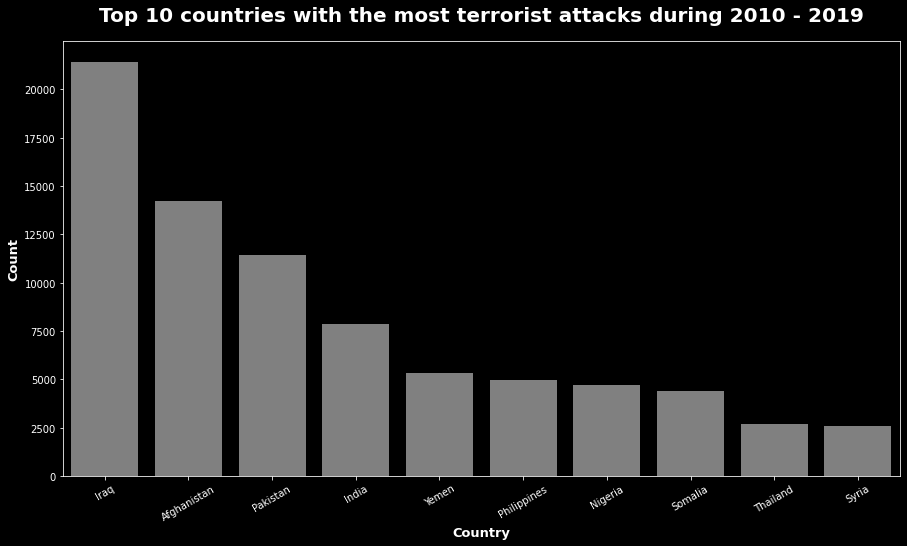

In [22]:
top_10_country = df_clean["Country"].value_counts().head(10).reset_index()
top_10_country.columns = ["Country","Count"]
plt.figure(figsize=(15, 8))
sns.barplot(data  = top_10_country, x = "Country", y = "Count", color = "grey")
plt.xticks(rotation=30)
plt.xlabel("Country", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')
plt.title("Top 10 countries with the most terrorist attacks during 2010 - 2019",size = 20, weight='bold', pad=20)

### 2.2 Who are the most two dangerous terrorist groups of the decade?

To determine which terrorist groups are most dangerous during the past decade, we will assess their activities based on two criteria:
* The number of terrorist attacks conducted
* The number of casualities (killed & wounded) caused

**Criteria 1: Based on the number of attacks conducted**

In [23]:
print(df_clean["Group"].value_counts().head(10))


Unknown                                           50906
Taliban                                            8956
Islamic State of Iraq and the Levant (ISIL)        6864
Al-Shabaab                                         4014
Boko Haram                                         3008
Houthi extremists (Ansar Allah)                    2770
New People's Army (NPA)                            2018
Maoists                                            1715
Communist Party of India - Maoist (CPI-Maoist)     1492
Kurdistan Workers' Party (PKK)                     1345
Name: Group, dtype: int64


While **"Unknown"** terrorist groups dominated the number of attacks throughout the period, based on the data included in the dataset, we can only identify that most of them are active in Iraq and Pakistan. As it is hard to deep dive and discover valuable insights from these unindentified groups, let's filter out these groups and only consider the rest.

The next two terrorist groups with highest number of attacking activies are Taliban & ISIL. To see if they are consistenly the most active group throughout the period, let's have a look at the top 1 most active group in each year of the decade:


In [24]:
#Filter out unknown group
by_group = df_clean[df_clean["Group"] != "Unknown"]
group = by_group.groupby(["Year","Group"])["Day"].count().reset_index()
group = group.rename(columns = {"Day":"Count"})
group = group.sort_values('Count', ascending=False).drop_duplicates(['Year']).sort_values("Year")
group

,Year,Group,Count
39,2010,Communist Party of India - Maoist (CPI-Maoist),505
209,2011,Communist Party of India - Maoist (CPI-Maoist),371
536,2012,Taliban,800
807,2013,Taliban,775
964,2014,Islamic State of Iraq and the Levant (ISIL),1251
1448,2015,Taliban,1249
1612,2016,Islamic State of Iraq and the Levant (ISIL),1470
1975,2017,Islamic State of Iraq and the Levant (ISIL),1358
2443,2018,Taliban,1249
2705,2019,Taliban,1366


**☆ Finding**

Back in the early years of the decade, Communist Party of India - Maoist (CPI-Maoist) was the most active group despite the low number of attacks they conducted ( <500).
After that, Taliban & ISIL took turn to become the group with the most attacks since 2014. ISIL has the record number of attack per year of the decade in 2016 (at 1470)

**Criteria 2: Based on the number of casualities they caused**

In [25]:
by_group.groupby("Group")["Casualities"].sum().reset_index().sort_values("Casualities", ascending = False)

,Group,Casualities
1019,Taliban,77918.0
471,Islamic State of Iraq and the Levant (ISIL),76703.0
252,Boko Haram,34347.0
77,Al-Shabaab,19630.0
1038,Tehrik-i-Taliban Pakistan (TTP),13605.0
...,...,...
902,Revolutionary Perspective,0.0
714,Nalut Group,0.0
900,Revolutionary Liberation Action (Epanastatiki ...,0.0
899,Revolutionary Insurgent Armed Forces of Ecuado...,0.0


In [26]:
def grouping(group):
  if group == "Taliban" or group == "Islamic State of Iraq and the Levant (ISIL)":
    return group
  else:
    return "Other"

In [27]:
by_group["New_Group"] = by_group["Group"].apply(grouping)

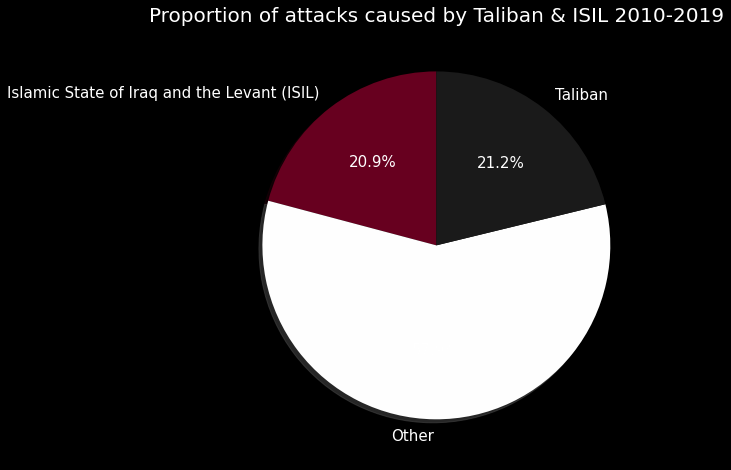

In [28]:
group_casualities = by_group.groupby("New_Group")["Casualities"].sum()
plot = group_casualities.plot.pie(y='New_Group', figsize=(15, 8), shadow = True, startangle=90, autopct='%1.1f%%', title = "Proportion of attacks caused by Taliban & ISIL 2010-2019",
                           colormap='RdGy', fontsize = 15)
plot.set_ylabel('')
plot.title.set_size(20)
 

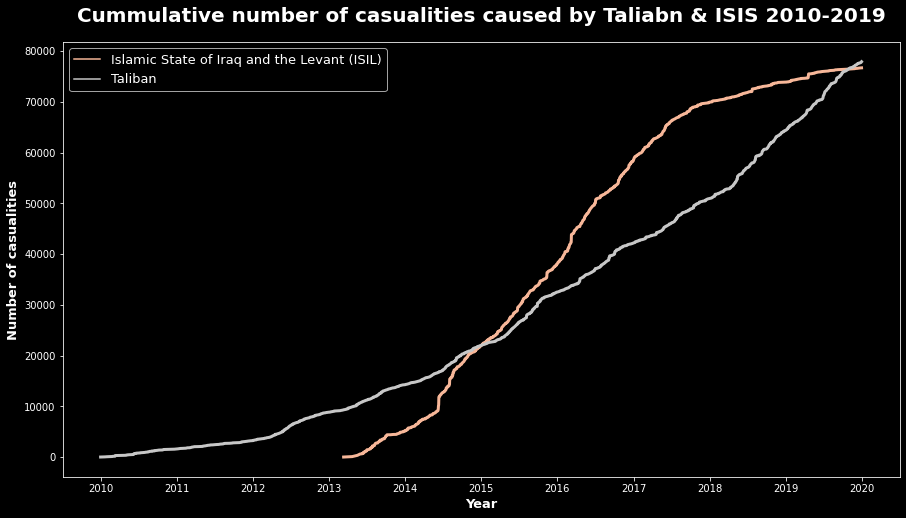

In [60]:
by_group["Full_date"] = pd.to_datetime(by_group['Day'].astype(str)+ ' ' + by_group['Month'].astype(str) +' ' + by_group['Year'].astype(str), format = "%d %m %Y")
by_2group = by_group.query("New_Group != 'Other'")
cumsum_casualities = by_2group.groupby(["New_Group","Full_date"])["Casualities"].sum().groupby('New_Group').cumsum().reset_index()
plt.figure(figsize=(15, 8))
sns.lineplot(data = cumsum_casualities, x= "Full_date", y= "Casualities", hue = "New_Group", palette = "RdGy", linewidth=3)
plt.title("Cummulative number of casualities caused by Taliabn & ISIS 2010-2019", size = 20, weight='bold', pad=20)
plt.xlabel("Year", fontsize = 13, weight='bold')
plt.ylabel("Number of casualities", fontsize = 13, weight='bold')
plt.rc('legend',fontsize=13)
plt.gca().legend().set_title('')


**☆ Finding**

Not only having conducted the highest number of terrorist attacks, Taliban & ISIL also caused the highest amount of casualities over the past decade, each has caused roughly 77.000 casualities (including killed and wounded), significantly higher than other terrorist groups and accounted for more than 40% of total attacks of all unanomymous groups during the period. Only after two year since its establishment in 2013, ISIL has surpassed Taliban in the number of casualities caused and remained the most deadliest terrorist group until the end of the decade.


Based on these analysis, we can conclude that the top II most active terrorist groups during the past decade are:
  - Taliban
  - Islamic State of Irag and the Levant (ISIL).

There are some reliable articles that also support this assessment, including:

-[The Deadliest Terrorist Groups In The World Today](https://www.forbes.com/sites/dominicdudley/2018/12/05/deadliest-terrorist-groups-in-the-world/?sh=3ad3451f2b3e) (Forbes): published in 2018 also ranked ISIL and Taliban as the deadliest terrorist groups around that time.

-[ISIL is No Longer the World’s Deadliest Terrorist Group](https://www.visionofhumanity.org/isil-is-no-longer-the-worlds-deadliest-terrorist-group/) (Vision of Humanity): also reported that ISIL used to be the most active and dangerous terror groups in the mid-decade, then The Taliban overtook ISIL as the world’s deadliest terrorist group in 2018

### 2.3 Differences in the terrorist activities of ISIL and Taliban


#### 2.3.1 Territories where they conduct attacking activities


In [30]:
#Narrow down the dataset
taliban = df_clean[df_clean["Group"]=="Taliban"]
isil = df_clean[df_clean["Group"]=="Islamic State of Iraq and the Levant (ISIL)"]
df_2group = df_clean[(df_clean["Group"]=="Taliban") |(df_clean["Group"]=="Islamic State of Iraq and the Levant (ISIL)") ]
df_2group

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Success,AttackType,Killed,Wounded,Target,Target_type,Target_subtype,Target_nationality,Summary,Group,Weapon_type,Weapon_subtype,Motive,Property_value,Casualities
94883,2010,1,1,Afghanistan,South Asia,Dwah Mande,33.469444,69.620278,1,Bombing/Explosion,4.0,0.0,The vehicle,Private Citizens & Property,Vehicles/Transportation,Afghanistan,"01/01/2010: On Friday afternoon, in the Dwaman...",Taliban,Explosives,Other Explosive Type,The specific motive for the attack is unknown.,0.0,4.0
94924,2010,1,10,Afghanistan,South Asia,Dawlatabad,36.420551,64.893890,1,Bombing/Explosion,4.0,2.0,Civilians,Private Citizens & Property,Unnamed Civilian/Unspecified,Afghanistan,"01/10/2010: On Sunday night, Taliban militants...",Taliban,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",The attack occurred because the family refused...,0.0,6.0
94967,2010,1,16,Afghanistan,South Asia,NaN,36.079561,64.905955,1,Hostage Taking (Kidnapping),0.0,0.0,Two Chinese engineers,Private Citizens & Property,Unnamed Civilian/Unspecified,China,"01/16/2010: On Saturday, in an unspecified loc...",Taliban,Unknown,Unknown,The specific motive for the attack is unknown.,0.0,0.0
94973,2010,1,17,Afghanistan,South Asia,NaN,34.176874,61.700565,1,Assassination,6.0,1.0,"The Chesht-e Sharif district chief, Abdul Qayyum,",Government (General),"Government Personnel (excluding police, military)",Afghanistan,"01/17/2010: On Sunday morning at 1000, in the ...",Taliban,Unknown,Unknown,The specific motive for the attack is unknown.,0.0,7.0
94986,2010,1,18,Afghanistan,South Asia,Jalalabad,34.417122,70.449593,1,Bombing/Explosion,0.0,0.0,An airport was targeted in the attack.,Airports & Aircraft,Airport,Afghanistan,"01/18/2010: On Monday, Taliban militants launc...",Taliban,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",The specific motive for the attack is unknown.,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201163,2019,12,31,Afghanistan,South Asia,Gurziwan district,35.630000,65.280000,1,Unknown,4.0,5.0,Outpost,Police,"Police Building (headquarters, station, school)",Afghanistan,12/31/2019: Assailants attacked a security out...,Taliban,Unknown,Unknown,Unknown,0.0,9.0
201164,2019,12,31,Afghanistan,South Asia,Konjak,36.004308,67.010686,1,Armed Assault,1.0,0.0,Civilians,Private Citizens & Property,Unnamed Civilian/Unspecified,Afghanistan,12/31/2019: Assailants killed a woman in Konja...,Taliban,Firearms,Unknown Gun Type,Unknown,0.0,1.0
201166,2019,12,31,Afghanistan,South Asia,Qala-e-Rig,34.371929,61.784666,1,Unknown,1.0,2.0,Vehicle,Government (General),Intelligence,Afghanistan,12/31/2019: Assailants attacked a government v...,Taliban,Unknown,Unknown,Unknown,-99.0,3.0
201170,2019,12,31,Syria,Middle East & North Africa,Tabqah,35.831482,38.545407,1,Unknown,3.0,0.0,Civilians,Private Citizens & Property,Unnamed Civilian/Unspecified,Syria,"12/00/2019: Sometime between December 29, 2019...",Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,Unknown,0.0,3.0


In [31]:
import plotly.express as px

fig = px.scatter_geo(df_2group,lat='Latitude',lon='Longitude', hover_name="Country", color = "Group", width = 1000, height = 600, opacity = 0.7)
fig.update_layout(title = 'The global terrorism spead of Taliban & ISIS 2010-2019', title_x=0.5)
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=-0.1,
    xanchor="left",
    x=0.2),
  paper_bgcolor="black",
  title={'font': {'size': 20, 'color':"white"}})
fig.update_layout(legend = {'font': {'size': 14, 'color':"white"}})

fig.show()

In [32]:
#Top target countries of the two groups
by_country = df_2group.groupby(["Group","Country"])["Year"].count().reset_index()
by_country = by_country.rename(columns = {"Year":"Count"})
by_country = by_country.sort_values(['Group','Count'],ascending=False).set_index(['Group','Country']).groupby(level=0).head(4)
by_country

Count
Group                                       Country            
Taliban                                     Afghanistan    8922
                                            Pakistan         32
                                            Tajikistan        1
                                            Turkmenistan      1
Islamic State of Iraq and the Levant (ISIL) Iraq           5857
                                            Syria           755
                                            Turkey           82
                                            Lebanon          54

**☆ Finding** 

As can be seen from the map, Taliban group seem to be very focused and geographically concentrated when they only conducted terrorism activities in Afghanistan and its neighbourhood.
bold text
However, ISIL's presence is more widespread accross different regions of the globe. They have actively conducted attacks in Middle East and Africa, South Asia. Some key target countries of this terror group include: Iraq, Syria, Turkey, Lebanon, Philippines

In [33]:
city_year = df_2group.groupby(["Group","Year"])["City"].nunique().reset_index()
city_year

,Group,Year,City
0,Islamic State of Iraq and the Levant (ISIL),2013,89
1,Islamic State of Iraq and the Levant (ISIL),2014,285
2,Islamic State of Iraq and the Levant (ISIL),2015,305
3,Islamic State of Iraq and the Levant (ISIL),2016,372
4,Islamic State of Iraq and the Levant (ISIL),2017,410
5,Islamic State of Iraq and the Levant (ISIL),2018,386
6,Islamic State of Iraq and the Levant (ISIL),2019,243
7,Taliban,2010,171
8,Taliban,2011,113
9,Taliban,2012,439


In [34]:
#Test groupby result
df_2group.query("Year == 2019 & Group == 'Taliban'")["City"].nunique()

706

([<matplotlib.axis.XTick at 0x7fb873b35fd0>,
 <a list of 10 Text major ticklabel objects>)

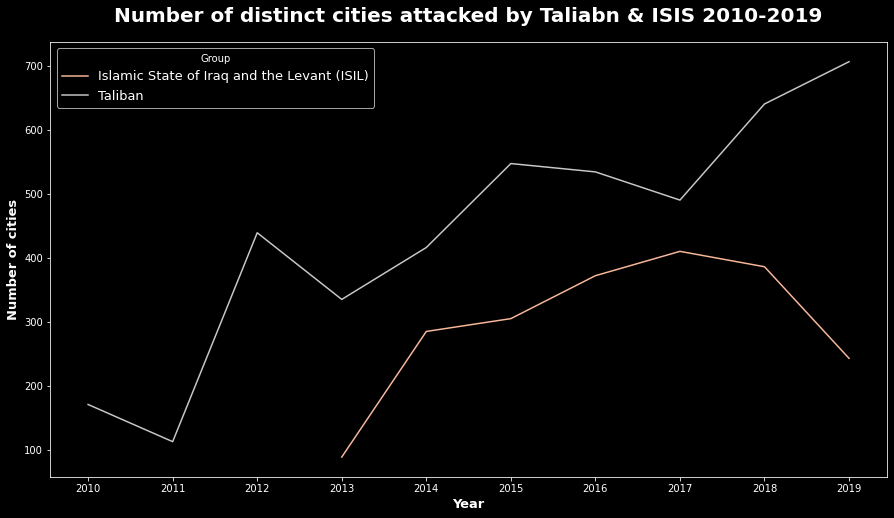

In [35]:
plt.figure(figsize=(15, 8))
sns.lineplot(data = city_year, x= "Year", y = "City", hue = "Group", palette = "RdGy")
plt.title("Number of distinct cities attacked by Taliabn & ISIS 2010-2019", size = 20, weight='bold', pad=20)
plt.xlabel("Year", fontsize = 13, weight='bold')
plt.ylabel("Number of cities", fontsize = 13, weight='bold')
plt.xticks(range(2010,2020,1))



In [36]:
df_2group.query("Year == 2019 & Group == 'Taliban' & Country == 'Afghanistan'")["City"].nunique()

706

In [37]:
df_2group.query("Year == 2019 & Group == 'Taliban' & Country == 'Afghanistan'")["City"].value_counts()

Unknown       65
Kunduz        32
Kabul         27
Ghazni        18
Farah         13
              ..
Shor Bolaq     1
Aq Chashma     1
Gajgeen        1
Nisar          1
Padahgak       1
Name: City, Length: 706, dtype: int64

**☆ Finding** 

While Tabilan only focuses its terrorist attacks in Afghanistan as identified earlier, it is clear from the graph that Taliban has spreaded its terrorist activities across a huge amount of different cities in this country. Specifically, in 2019, Taliban has attacked 706 different cities in Afghanistan. Some cities that have been attacked most often are: Kunduz, Kabul, Ghazni. These are major regional capital of Afghanistan and strategically important to both the Taliban and the government force. 

Kunduz is the home to 270,000 people and is considered a gateway to the country's mineral-rich northern provinces. And its location makes it strategically important as there are highways connecting Kunduz to other major cities, including Kabul, and the province shares a border with Tajikistan.

<img src="https://ichef.bbci.co.uk/news/976/cpsprodpb/12CCD/production/_119550077_afghanistan_govtaliban_control_map_20172x640-nc.png" alt="Drawing" style="width: 800px;"/>

In 2017, Kunduz is still not under the control of Taliban. Therefore, Taliban has been actively conducted terrorist activities in this region to gain the control over this territory. And they have been successful with their attacking effort: In 2021, Taliban has finally gained control in Kunduz


<img src="https://ichef.bbci.co.uk/news/2048/cpsprodpb/E3B1/production/_119898285_afghanistancontrolmap_11_aug_640-nc.png" alt="Drawing" style="width: 800px;"/>



#### 2.3.2 Group's terrorist progress &  attacking pattern (by time)

Text(0, 0.5, 'Count')

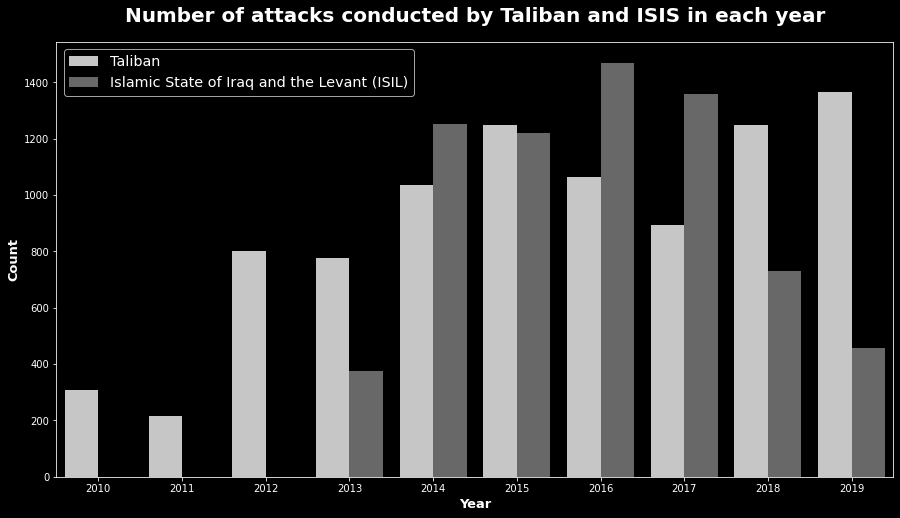

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(data = df_2group, x= "Year", hue= "Group", palette = "Greys")
plt.legend(fontsize='x-large', title_fontsize='13',loc='upper left')
plt.title("Number of attacks conducted by Taliban and ISIS in each year", size = 20, weight='bold', pad=20)
plt.xlabel("Year", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')

**☆ Finding** 

Based on the dataset, Taliban has a longer history of conducting terroist activities, while ISIL only started to become prominent since 2013. However, ISIS is not a completely new terrorist group: Originally, the terrorist group was a part of al-Qaeda in Iraq (AQI) which were founded in 2004, then in 2012 AQI  renamed itself the Islamic State of Iraq (ISI) and in April 2014, it was renamed ISIL, growing out of the former al-Qaeda in Iraq (AQI) group.

In its first year after renaming, ISIL was not very active and only conducted roughtly 400 attacks. However, it has quickly become very aggresstive over the next 4 year with more than 1,200 attacks per year continuously (with a peak of the whole period in 2016 at ~ 1,500 attacks). During the same period, we can witness a moderately medium-high level of terrorist activities Taliban as well, at around ~ 1,000 attacks per year. Taliban became less active in 2016 and 2017 before returning to a new peak at the end of the decade when ISIL slowed down its attacking activities.

(*) One of the reason why ISIL has been less active since 2018 is that: As of 2017, the U.S. military estimated that it had killed 75% of the Islamic State affiliate's fighters, including some of its top leaders. ([Link]((https://www.npr.org/2021/08/26/1031349674/isis-k-taliban-who-what-you-need-to-know)))


Text(0, 0.5, 'Count')

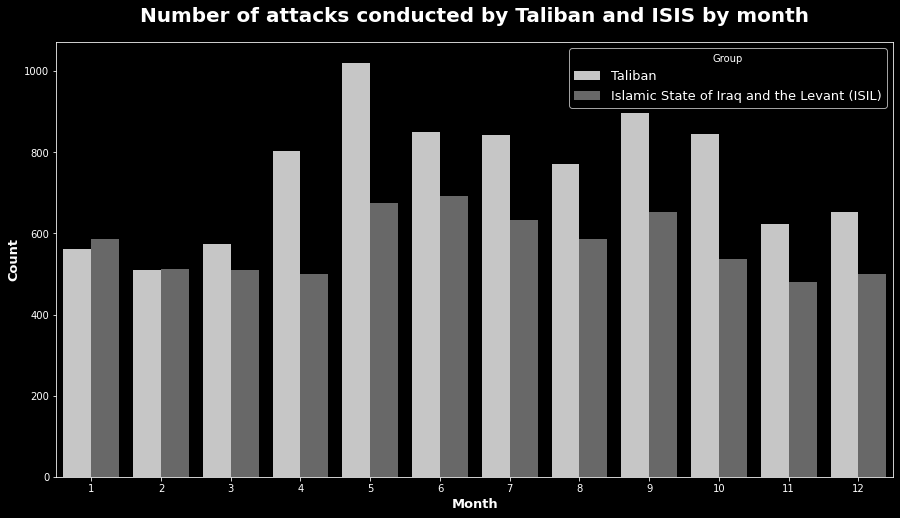

In [39]:
#The number of attacks by month
plt.figure(figsize=(15,8))
sns.countplot(data = df_2group, x= "Month", hue = "Group",palette = "Greys")
plt.title("Number of attacks conducted by Taliban and ISIS by month", size = 20, weight='bold', pad=20)
plt.xlabel("Year", fontsize = 13, weight='bold')
plt.xlabel("Month", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')

<Figure size 1080x576 with 0 Axes>

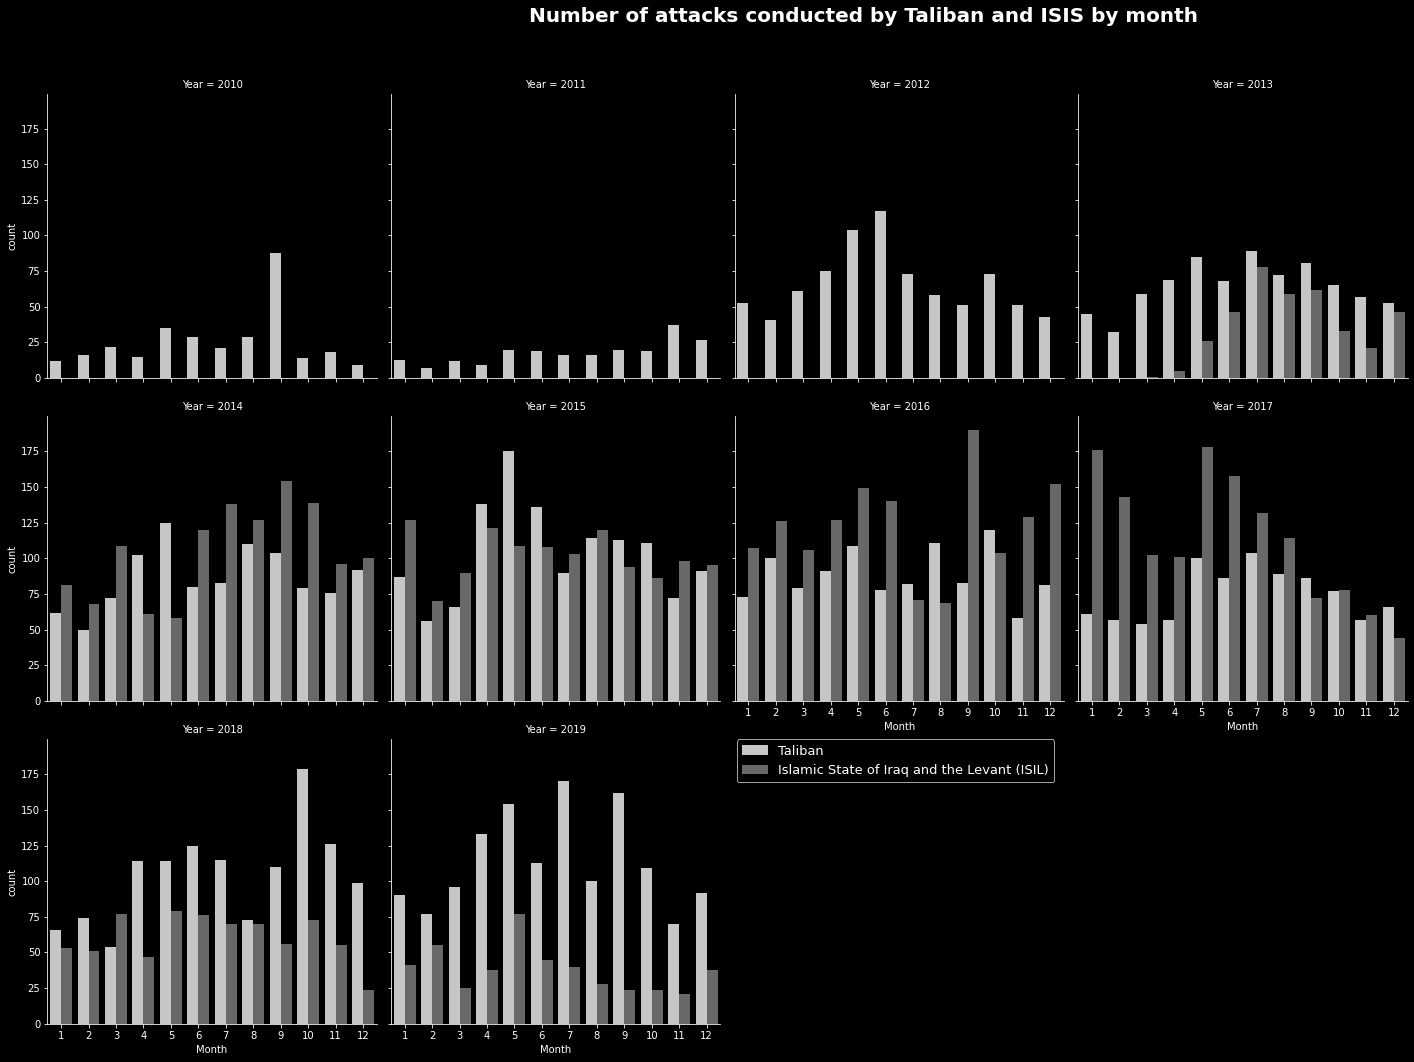

In [40]:
#Create subplot by year
plt.figure(figsize=(15,8))
facet = sns.catplot(data = df_2group, x= "Month", hue = "Group",palette = "Greys", kind = "count", col = "Year", col_wrap=4)
facet.fig.subplots_adjust(top=0.9)
facet.fig.suptitle("Number of attacks conducted by Taliban and ISIS by month", size = 20, weight = 'bold')
facet._legend.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**☆ Finding** 

A general trend can be observed is that both terrorist parties often become very active since April and keep the attacking momentum until October - November.

Therefore, the period from December - March could be considered as a peaceful/ "off-peak" season when both of the two terrorist groups do not conduct many attacks.

However, it is noticable that in 2017, ISIL started its attacking activities very early on, with a significantly high number of attack in January & February.

Let's dive into the summary description (text) and the top cities being attacks to understand what happened during that period:

In [41]:
isil_2017 = df_2group.query('Group == "Islamic State of Iraq and the Levant (ISIL)" & Year == "2017" & (Month == "1" or Month == "2")').sort_values("Casualities",ascending = False)
isil_2017.head(5)
isil_2017["Text"] = isil_2017["Summary"] + " " + isil_2017["City"]
# isil_2017["Text"].iloc[1]

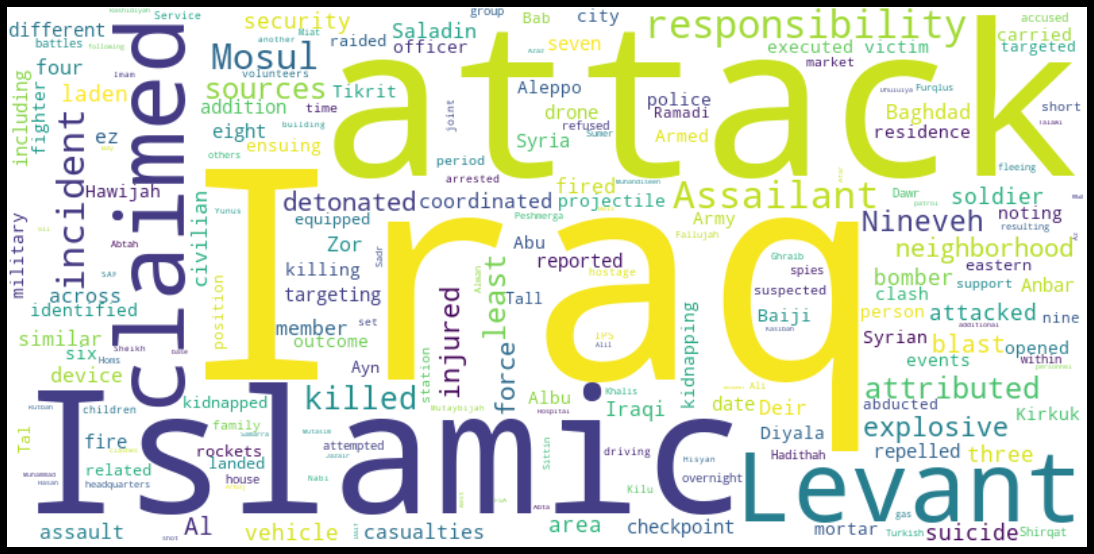

In [42]:
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.update(["unknown","isil","group","number","state","one","two","people","five","day","volunteer","near","district"])
stopwords = set(STOPWORDS) 


text = " ".join(review for review in isil_2017["Text"].astype(str))

# Generate a word cloud image

plt.figure( figsize=(15,8))

wordcloud = WordCloud(collocations=False,stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image the matplotlib way:

plt.axis("off")

plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()


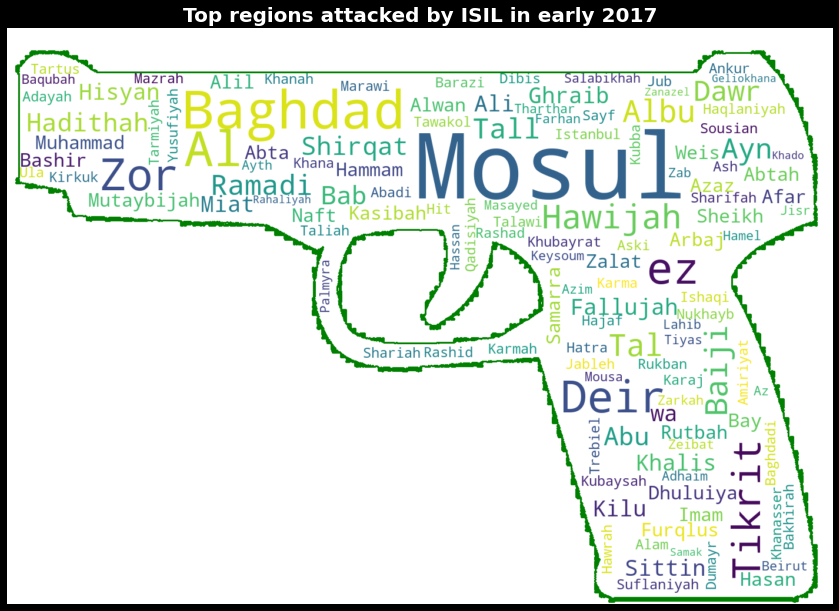

In [43]:
from PIL import Image

text = " ".join(review for review in isil_2017["City"].astype(str))

# Generate a word cloud image
plt.figure( figsize=(15,8))

gun = np.array(Image.open("/content/gdrive/MyDrive/Data Science Course/Terrorism project - Duy Nghi/Picture 1.jpg"))
gun


wordcloud = WordCloud(collocations=False,stopwords=stopwords, background_color="white", width=800, height=400, mask=gun,
                      contour_width=3, contour_color='green').generate(text)

wordcloud.to_file("gun.png")


# Display the generated image the matplotlib way:

plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Top regions attacked by ISIL in early 2017",fontsize = 20, weight = 'bold')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()



From the WordCloud generated from the summary description, we can understand the background of those attacks early on the beginning of the year 2017 are mainly bombing attack happening in various cities of Irad, namely: Mosul, Baghdad, Tikrit, ...

In [44]:
# NEED REVIEW - by Month attack - line chart - smoothing by rolling needed

# #Create new columns of month & year
# df_2group["Month_year"] = pd.to_datetime(df_2group['Month'].astype(str) +' ' + df['Year'].astype(str))
# monthly_attack  = df_2group.groupby(["Group","Month_year"])["Region"].count().reset_index()
# monthly_attack.columns = ["Group","Time","Count"]

In [45]:
# plt.figure(figsize=(25,8))
# sns.lineplot(data = monthly_attack, x= "Time", y = "Count", hue = "Group",palette = "RdGy")
# plt.legend(fontsize='x-large', title_fontsize='13',loc='upper left')
# plt.xticks(monthly_attack["Time"].unique()[3::6], rotation = 30)

#### 2.3.3 Weapons used by two groups

In [46]:
weapon = df_2group.groupby(["Group","Weapon_type"])["Year"].count().reset_index()
#Clean the long name Vehicle (....)
weapon["Weapon_type"] = weapon["Weapon_type"].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', "Vehicle")
weapon = weapon.rename(columns = {"Year":"Count"})
weapon = weapon.sort_values(["Group",'Count'],ascending=False).set_index(['Group','Weapon_type']).groupby(level=0).head(10)
weapon


Count
Group                                       Weapon_type              
Taliban                                     Explosives           3293
                                            Firearms             2862
                                            Unknown              2478
                                            Incendiary            213
                                            Melee                  78
                                            Chemical               21
                                            Sabotage Equipment      6
                                            Other                   4
                                            Vehicle                 1
Islamic State of Iraq and the Levant (ISIL) Explosives           4480
                                            Unknown              1381
                                            Firearms              799
                                            Incendiary             79
                                            Melee                  69
                                            Chemical               41
                                            Other                  10
                                            Vehicle                 3
                                            Sabotage Equipment      2

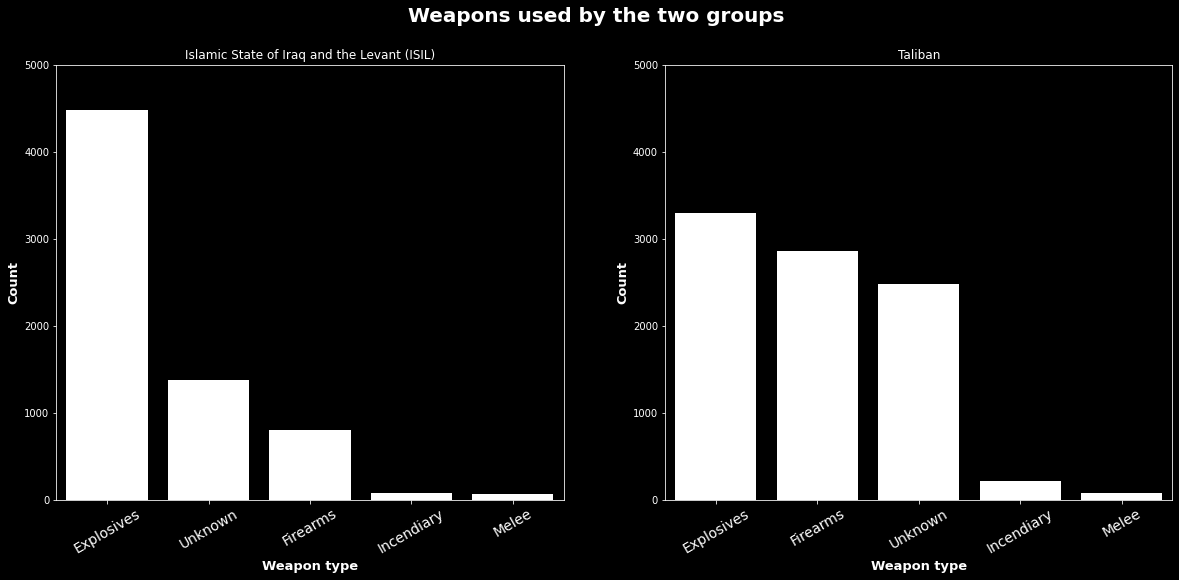

In [48]:
weapon = weapon.reset_index()

plt.figure(figsize=(20,8))

plt.subplot(121)
weapon_isil = weapon[weapon["Group"] == "Islamic State of Iraq and the Levant (ISIL)"].sort_values("Count",ascending = False).head(5)
weapon_taliban = weapon[weapon["Group"] == "Taliban"].sort_values("Count", ascending = False).head(5)
sns.barplot(data = weapon_isil, x= "Weapon_type", y = "Count", order = weapon_isil.sort_values("Count",ascending = False).Weapon_type, color = "white")
plt.xticks(fontsize=14,rotation=30)
plt.xlabel("Weapon type", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')
plt.ylim((0,5000))


plt.title('Islamic State of Iraq and the Levant (ISIL)')

plt.subplot(122)
sns.barplot(data = weapon_taliban, x= "Weapon_type", y = "Count", order = weapon_taliban.sort_values("Count",ascending = False).Weapon_type, color = "white")
plt.xticks(fontsize=14,rotation=30)
plt.title('Taliban')
plt.xlabel("Weapon type", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')
plt.ylim((0,5000))

plt.suptitle('Weapons used by the two groups', size = 20, weight = 'bold') 

plt.show()





**☆ Finding**

The top 5 most used weapons of the two groups are quite similar. Explosive weapons are the most frequently used mode of attacks of both ISIL and Taliban.

However, there are some noticebale differences between the weapon types of the 2 groups:

- Taliban is more versatile and flexibly adopts various forms of weapons quite equally (Explosives, Firearms and Unknown). Meanwhile, ISIL soly focused on using explosive weapons rather than adopting other forms of attacks.

- Nearly 2500 attacks conducted by Taliban group in the past decade are "Unknown" - That sounds mysterious, and we might need to conduct further research to reveal the forms of weapons that Taliban used.




In [ ]:
df_2group[df_2group["Weapon_type"] == "Unknown"].sort_values("Casualities", ascending = False).head(5)

,Year,Month,Day,Country,Region,City,Latitude,Longitude,Success,AttackType,Killed,Wounded,Target,Target_type,Target_subtype,Target_nationality,Summary,Group,Weapon_type,Weapon_subtype,Motive,Property_value,Casualities
136312,2014,8,3,Iraq,Middle East & North Africa,Sinjar,36.319387,41.861475,1,Hostage Taking (Kidnapping),953.0,0.0,Yizidi Civilians,Private Citizens & Property,Religion Identified,Iraq,08/03/2014: Assailants attacked Yizidi civilia...,Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,"The specific motive is unknown; however, sourc...",-99.0,953.0
158911,2016,2,7,Iraq,Middle East & North Africa,Mosul,36.354146,43.143571,1,Hostage Taking (Kidnapping),300.0,0.0,Officers,Police,Police Security Forces/Officers,Iraq,02/07/2016: Assailants executed 300 civilian a...,Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,"The specific motive is unknown; however, sourc...",0.0,300.0
146702,2015,4,9,Iraq,Middle East & North Africa,Qaim,34.363503,41.115997,1,Hostage Taking (Kidnapping),300.0,0.0,Tribal Civilians,Private Citizens & Property,Unnamed Civilian/Unspecified,Iraq,04/09/2015: Assailants executed 300 tribal civ...,Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,Unknown,0.0,300.0
161758,2016,4,21,Iraq,Middle East & North Africa,Mosul,36.354146,43.143571,1,Hostage Taking (Kidnapping),250.0,0.0,Civilians,Private Citizens & Property,Unnamed Civilian/Unspecified,Iraq,04/21/2016: Assailants executed 250 women in M...,Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,"The specific motive is unknown; however, sourc...",0.0,250.0
177621,2017,6,4,Iraq,Middle East & North Africa,Tal Afar,36.376825,42.448876,1,Hostage Taking (Kidnapping),200.0,0.0,Turkmen Civilians,Private Citizens & Property,Race/Ethnicity Identified,Iraq,06/04/2017: Assailants abducted 200 Turkmen ci...,Islamic State of Iraq and the Levant (ISIL),Unknown,Unknown,"The specific motive is unknown; however, sourc...",0.0,200.0


Interestingly, even though ISIL is the group with fewer use of unidentified weapons, it has caused the most casualities with unknown weapon attacks:
Nearly 1000 people were killed on 3/8/2014 in Sinja, Iraq,

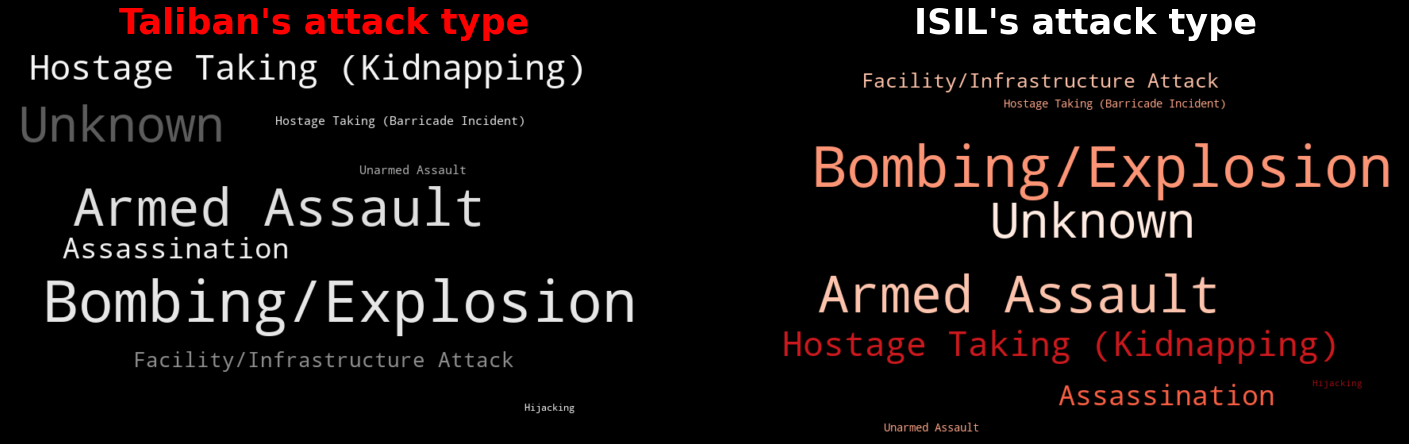

In [ ]:
#ATTACK TYPE
attack = df_2group.groupby(["Group","AttackType"])["Year"].count().reset_index()
attack = attack.rename(columns = {"Year":"Count"})
attack = attack.sort_values(['Group','Count'],ascending=False).set_index(['Group','AttackType']).reset_index()
taliban_attack = attack[attack["Group"] =="Taliban"]
taliban_data = taliban_attack .set_index('AttackType').to_dict()['Count']
taliban_wc = WordCloud(width=800, height=500, max_words=200,colormap="Greys").generate_from_frequencies(taliban_data)
isil_attack = attack[attack["Group"] =="Taliban"]
isil_data = isil_attack .set_index('AttackType').to_dict()['Count']
isil_wc = WordCloud(width=800, height=500, max_words=200, colormap="Reds").generate_from_frequencies(isil_data)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,25))
ax1.imshow(taliban_wc, interpolation='bilinear')
ax1.axis('off')
ax1.set_title("Taliban's attack type", fontweight="bold", size=35, color= 'red')
ax2.imshow(isil_wc, interpolation='bilinear')
ax2.axis('off')
ax2.set_title("ISIL's attack type", fontweight="bold", size=35)

# plt.suptitle("Popular attacking modes of two groups", size = 20, weight = 'bold') 
plt.show()



#### 2.3.4 Who are the targets?

In [ ]:
target = df_2group.groupby(["Group","Target_type"])["Year"].count().reset_index()
target = target.rename(columns = {"Year":"Count"})
target = target.sort_values(['Group','Count'],ascending=False).set_index(['Group','Target_type']).groupby(level=0).head(5)
target

Count
Group                                       Target_type                        
Taliban                                     Police                         3228
                                            Military                       2035
                                            Private Citizens & Property    1533
                                            Government (General)            939
                                            Unknown                         317
Islamic State of Iraq and the Levant (ISIL) Private Citizens & Property    2694
                                            Military                       1778
                                            Police                          834
                                            Business                        320
                                            Terrorists/Non-State Militia    289

Text(0, 0.5, 'Count')

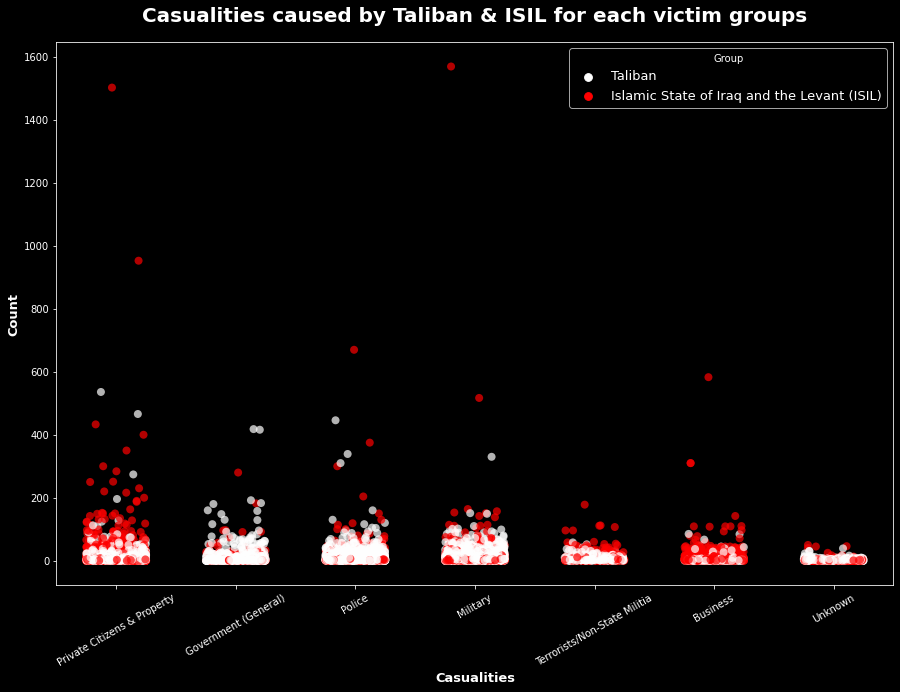

In [ ]:
top_target = target.reset_index()["Target_type"].unique()
target_df = df_2group[df_2group["Target_type"].isin(top_target)]
plt.figure(figsize=(15, 10))
palette = {"Taliban":"white",
           "Islamic State of Iraq and the Levant (ISIL)":"red"}
sns.stripplot(data=target_df, y = "Casualities", x = "Target_type", hue = "Group", palette =palette, jitter=0.25, size=8, alpha = 0.7)
plt.xticks(rotation = 30)
plt.title("Casualities caused by Taliban & ISIL for each victim groups", size = 20, weight='bold', pad=20)
plt.xlabel("Target type", fontsize = 13, weight='bold')
plt.xlabel("Casualities", fontsize = 13, weight='bold')
plt.ylabel("Count", fontsize = 13, weight='bold')


**☆ Finding**

There are some differencies in the target groups and the level of casualities Taliban and ISIL caused for each victim groups:

- ISISL's most favorite targets are Private citizens & properties/ Businesses while Taliban's atttacks primarily aimed for government, police and military force

- Taliban's attacks are quite equally organized accross different targets, in terms of the casualities they caused. In contrast, ISIL have conducted exceptionally serious attacks that killed/ injured unsually large amount of pricate citizensm police, nilitary & businesses.



#### 2.3.5 The deadliest attack of the decade





In [ ]:
df_2group.groupby("Group")["Casualities"].nlargest(5)


Group                                              
Islamic State of Iraq and the Levant (ISIL)  133543    1570.0
                                             160046    1503.0
                                             136312     953.0
                                             133249     670.0
                                             164772     583.0
Taliban                                      153803     536.0
                                             189114     466.0
                                             186511     446.0
                                             161674     418.0
                                             151718     416.0
Name: Casualities, dtype: float64

It can be inferred from the table above that ISIL terrorist group often conducts terrorist in a larger scale and causes significantly higher casualities than Taliban. The most deadliest attacks caused by ISIL injured/killed nearly 1600 people, nearly triples that number of Taliban's.

Let's check to see if this is also the deadliest attack of the century

In [ ]:
#Verify the number of the largest casualities of the whole dateset
df_clean["Casualities"].nlargest(1)

133543    1570.0
Name: Casualities, dtype: float64

In [ ]:
#If casualities = killed/ injured ?
df_clean["Killed"].nlargest(1)

133543    1570.0
Name: Killed, dtype: float64

So we can confirm now that ISIL is the group that caused the most horrible attack of the decade in which 1570 people were killed.

In [ ]:
print(f"Summary : {df_2group.query('Killed == 1570')['Summary'].values[0]}")
print(f"Motive : {df_2group.query('Killed == 1570')['Motive'].values[0]}")
print(f"Attack type : {df_2group.query('Killed == 1570')['AttackType'].values[0]}")
print(f"Target : {df_2group.query('Killed == 1570')['Target'].values[0]}")
print(f"Weapon : {df_2group.query('Killed == 1570')['Weapon_type'].values[0]}")
print(f"Weapon_SubType : {df_2group.query('Killed == 1570')['Weapon_subtype'].values[0]}")

Summary : 06/12/2014: Assailants abducted approximately 1686 soldiers from Camp Speicher in Tikrit city, Saladin governorate, Iraq. Two captives escaped custody and at least 1570, if not all of the remaining victims, are presumed dead. The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.
Motive : The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.
Attack type : Hostage Taking (Kidnapping)
Target : Soldiers
Weapon : Firearms
Weapon_SubType : Unknown Gun Type


This attack is also known as [Camp Speicher massacre](https://en.wikipedia.org/wiki/Camp_Speicher_massacre), which happened on 06/12/2014 in Tikrit city by ISIL, using guns killing nearly 1600 people in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.



#### Foor for thought

Apply correlation
Review past knowldge to see which has not been applied

Summary & Finding - add emoji visual

Scraping something ???

News about those countries in specific years - What do ppl talk about them ?

Tips for presenting google collab

Review best projects on Kaggle to improve: Question - layout - presentation of the analysis


 - Use heatmap on: continent & year


## 3. CONCLUSION


In this project, I have applied the fundamental tools of a data analyst, including Pandas, Matplotlib, Seaborn & some visualization libraries to explore, clean and analyze a massive dataset on the topic of terrorism.

Some relevant insights have been discovered and communicated throughout the project with the use of appropriate visualiazations.

In addition to the practice of technical skills, I have also reinforced my understanding regarding the steps/lifecycle of a data analysis task.

Next step:

- Reconstruct the story to be more succint and cohesive  

- Use further presentation/ visualization tools to enhance the visualizations.

- Consider using related external dataset to enrich the content of the analysis